# L04: Universal Time vs Local Time

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np

# our library
import i4s_lib as i4s

folder='i4s_geomag_data/'
month='201303'

# observatories used in Dst index
obs=['her','hon','kak','sjg']

# days to observe: five first days '01' - '05'
qs=pd.Series(range(1,6))
qs=pd.Series.tolist(qs.apply(lambda x: '{0:0>2}'.format(x)))
print(qs)
# variable to contain all the values (1440 minutes) of all four observatories,
# for the five quiet days
dat = np.zeros([len(obs),len(qs),1440])

# read all the quiet days of the month for each observatory (only the H component (c1))
for o in obs:
    for q in qs:
        filename=o + month + q + '*min.min'
        df=i4s.read_im(filepattern=filename,folder=folder)
        data=df['data']
        dat[obs.index(o)][qs.index(q)][:]=data.c1

['01', '02', '03', '04', '05']


# Let's see the data for five consecutive days

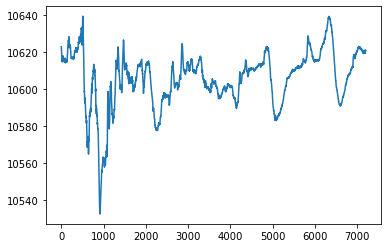

In [2]:
#  HER days
plt.plot(dat[0][:][:].reshape(-1));

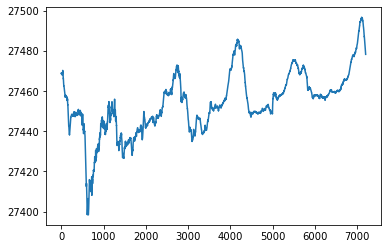

In [3]:
# HON days
plt.plot(dat[1][:][:].reshape(-1));

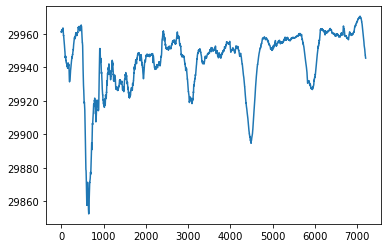

In [4]:
# KAK days
plt.plot(dat[2][:][:].reshape(-1));

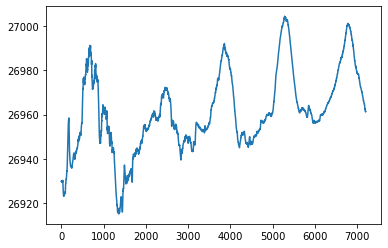

In [5]:
# SJG days
plt.plot(dat[3][:][:].reshape(-1));

## Q01: What are the periodic variations due to?. 
### A01:

# Let's mark the transition between local days in the figures

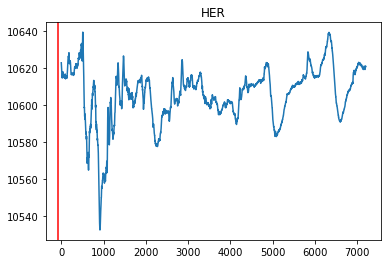

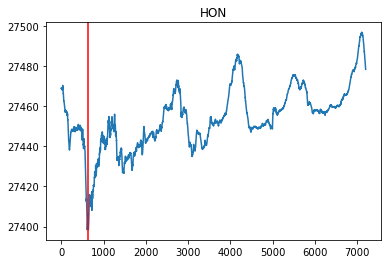

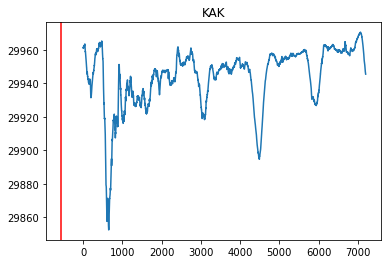

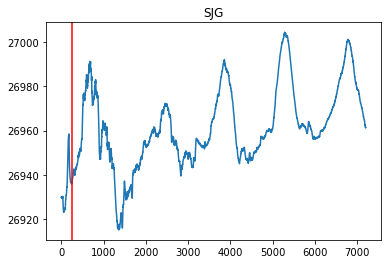

In [6]:
# Get longitudes for all four observatories like we have done in other examples
lons=['','','','']
for o in obs:
    filename=o + month + q + '*min.min'
    df=i4s.read_im(filepattern=filename,folder=folder)
    lons[obs.index(o)]=df['lon']
    
# Convert longitudes to numbers in the range -180 and 180    
lons = [(float(lon) + 180) % 360 - 180 for lon in lons]

# Calculate the number of minutes the local time change from one day to the other, respect of UT
mins=[]
for lon in lons:
    mins.append(-int(lon / 360 * 1440))

# Show in a figure where that point is situated (local midnight)
# For HER
plt.plot(dat[0][:][:].reshape(-1));
plt.axvline(x = mins[0], color = 'r')
plt.title('HER')
plt.show();

# For HON
plt.plot(dat[1][:][:].reshape(-1));
plt.axvline(x = mins[1], color = 'r')
plt.title('HON')
plt.show();

# For KAK
plt.plot(dat[2][:][:].reshape(-1));
plt.axvline(x = mins[2], color = 'r')
plt.title('KAK')
plt.show();

# For SJG
plt.plot(dat[3][:][:].reshape(-1));
plt.axvline(x = mins[3], color = 'r')
plt.title('SJG')
plt.show();

## Q02: What do you think it means the red lines that are out of the data zone? Does that make sense to you?

### A02:

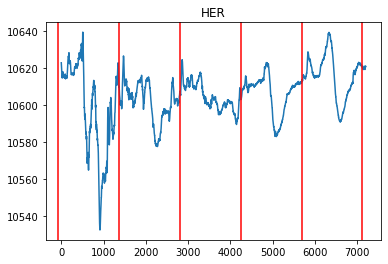

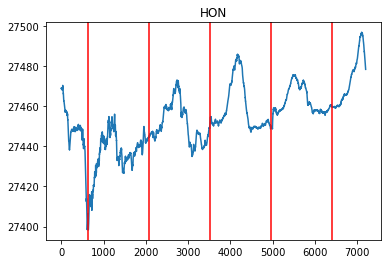

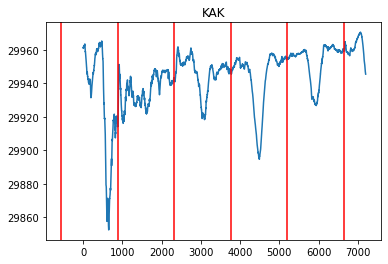

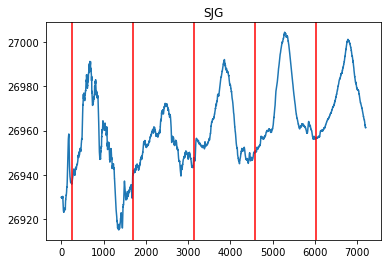

In [7]:
# Show all locations for local midnights

# number of days
n=len(qs)

# For HER
io=0
plt.plot(dat[io][:][:].reshape(-1));
noches = range(mins[io],mins[io]+n*1440,1440)
for i in range(n):
    plt.axvline(x = noches[i], color = 'r')
# an extra red line if the longitude is negative  
if noches[0] < 0:
    plt.axvline(x = noches[-1]+1440, color='r')
plt.title('HER')
plt.show();

# For HON
io=1
plt.plot(dat[io][:][:].reshape(-1));
noches = range(mins[io],mins[io]+n*1440,1440)
for i in range(n):
    plt.axvline(x = noches[i], color = 'r')
# an extra red line if the longitude is negative  
if noches[0] < 0:
    plt.axvline(x = noches[-1]+1440, color='r')
plt.title('HON')
plt.show();

# For KAK
io=2
plt.plot(dat[io][:][:].reshape(-1));
noches = range(mins[io],mins[io]+n*1440,1440)
for i in range(n):
    plt.axvline(x = noches[i], color = 'r')
# an extra red line if the longitude is negative  
if noches[0] < 0:
    plt.axvline(x = noches[-1]+1440, color='r')
plt.title('KAK')
plt.show();

# For SJG
io=3
plt.plot(dat[io][:][:].reshape(-1));
noches = range(mins[io],mins[io]+n*1440,1440)
for i in range(n):
    plt.axvline(x = noches[i], color = 'r')
# an extra red line if the longitude is negative  
if noches[0] < 0:
    plt.axvline(x = noches[-1]+1440, color='r')
plt.title('SJG')
plt.show();

## Q03: To which local day belongs the extra line? To which UT day?

### A03:

# Let's see now the magnitude of the values at midnight

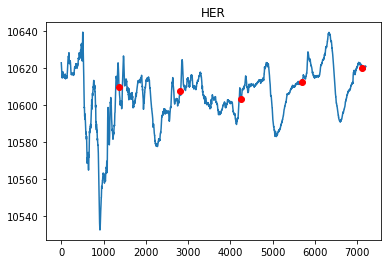

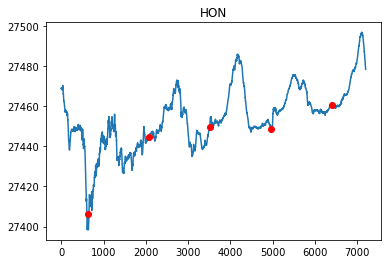

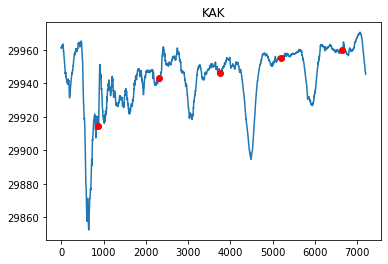

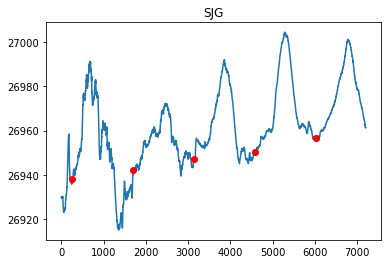

In [8]:
# For HER
io=0
datos=dat[io][:][:].reshape(-1)
plt.plot(datos);
noches = list(range(mins[io],mins[io]+n*1440,1440))
values = [0.]*n
for i in range(n):
    values[i] = datos[noches[i]]
# if the longitude is neggative, the first value belongs to the last day  
if noches[0] < 0:
    noches[0] = noches[-1]+1440
plt.scatter(noches,values, color='r', zorder=2)
plt.title(obs[io].upper())
plt.show();

# For HON
io=1
datos=dat[io][:][:].reshape(-1)
plt.plot(datos);
noches = list(range(mins[io],mins[io]+n*1440,1440))
values = [0.]*n
for i in range(n):
    values[i] = datos[noches[i]]
# if the longitude is neggative, the first value belongs to the last day  
if noches[0] < 0:
    noches[0] = noches[-1]+1440
plt.scatter(noches,values, color='r', zorder=2)
plt.title(obs[io].upper())
plt.show();

# For KAK
io=2
datos=dat[io][:][:].reshape(-1)
plt.plot(datos);
noches = list(range(mins[io],mins[io]+n*1440,1440))
values = [0.]*n
for i in range(n):
    values[i] = datos[noches[i]]
# if the longitude is neggative, the first value belongs to the last day  
if noches[0] < 0:
    noches[0] = noches[-1]+1440
plt.scatter(noches,values, color='r', zorder=2)
plt.title(obs[io].upper())
plt.show();

# For SJG
io=3
datos=dat[io][:][:].reshape(-1)
plt.plot(datos);
noches = list(range(mins[io],mins[io]+n*1440,1440))
values = [0.]*n
for i in range(n):
    values[i] = datos[noches[i]]
# if the longitude is neggative, the first value belongs to the last day  
if noches[0] < 0:
    noches[0] = noches[-1]+1440
plt.scatter(noches,values, color='r', zorder=2)
plt.title(obs[io].upper())
plt.show();

## Q04: About the red points, are they values affected by the ionosphere? do you think there are other less affected by the ionosphere?

### A04:

# Let's see a slightly modified version. Obtaining the values of the average of two hours centered on midnight

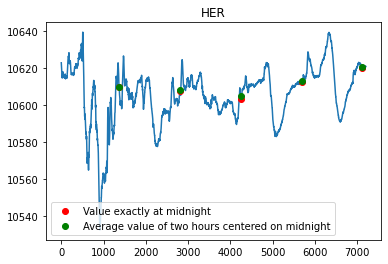

In [9]:
# For HER
io=0
datos=dat[io][:][:].reshape(-1)
plt.plot(datos);
noches = list(range(mins[io],mins[io]+n*1440,1440))
values = [0.]*n
mean_vals = [0.]*n
for i in range(n):
    values[i] = datos[noches[i]]
    mean_vals[i] = np.mean(datos[noches[i]-60:noches[i]+60])
# if the longitude is neggative, the first value belongs to the last day  
if noches[0] < 0:
    noches[0] = noches[-1]+1440
plt.scatter(noches,values, color='r', zorder=2, label='Value exactly at midnight')
plt.scatter(noches,mean_vals, color='g', zorder=2, label='Average value of two hours centered on midnight')

plt.title(obs[io].upper())
plt.legend()
plt.show();

## Q05: What do you think might be the utility of obtaining those values?

### A05: